# Real or Not? NLP with Disaster Tweets
Predict which Tweets are about real disasters and which ones are not.

**Competition Description :**
* Twitter has become an important communication channel in times of emergency. The ubiquitousness of smartphones enables people to announce an emergency they’re observing in real-time. Because of this, more agencies are interested in programatically monitoring Twitter (i.e. disaster relief organizations and news agencies). But, it’s not always clear whether a person’s words are actually announcing a disaster.

**Acknowledgments :**
* This dataset was created by the company figure-eight and originally shared on their ‘Data For Everyone’ [website here.](https://appen.com/resources/datasets/)

**Columns :**
* `id` - a unique identifier for each tweet

* `text` - the text of the tweet

* `location` - the location the tweet was sent from (may be blank)

* `keyword` - a particular keyword from the tweet (may be blank)

* `target` - in train.csv only, this denotes whether a tweet is about a real disaster (1) or not (0)

## Loading the Dataset :

In [1]:
import pandas as pd

In [2]:
df = pd.read_csv('train.csv')

## Data Preview :

In [3]:
df.head()

,id,keyword,location,text,target
0,1,NaN,NaN,Our Deeds are the Reason of this #earthquake M...,1
1,4,NaN,NaN,Forest fire near La Ronge Sask. Canada,1
2,5,NaN,NaN,All residents asked to 'shelter in place' are ...,1
3,6,NaN,NaN,"13,000 people receive #wildfires evacuation or...",1
4,7,NaN,NaN,Just got sent this photo from Ruby #Alaska as ...,1


In [4]:
df.tail()

,id,keyword,location,text,target
7608,10869,NaN,NaN,Two giant cranes holding a bridge collapse int...,1
7609,10870,NaN,NaN,@aria_ahrary @TheTawniest The out of control w...,1
7610,10871,NaN,NaN,M1.94 [01:04 UTC]?5km S of Volcano Hawaii. htt...,1
7611,10872,NaN,NaN,Police investigating after an e-bike collided ...,1
7612,10873,NaN,NaN,The Latest: More Homes Razed by Northern Calif...,1


In [5]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
id,7613.0,5441.934848,3137.11609,1.0,2734.0,5408.0,8146.0,10873.0
target,7613.0,0.429660,0.49506,0.0,0.0,0.0,1.0,1.0


In [6]:
df.describe(include=['object']).T

,count,unique,top,freq
keyword,7552,221,fatalities,45
location,5080,3341,USA,104
text,7613,7503,11-Year-Old Boy Charged With Manslaughter of T...,10


In [7]:
df.shape

(7613, 5)

* The train CSV contain 7613 Rows and 5 columns.

In [8]:
df.target.value_counts()

0    4342
1    3271
Name: target, dtype: int64

* In this Dataset 3271 tweets is a real disaster (1) tweet whereas 4342 tweets is not a disaster (0) tweet.

In [9]:
df['length_text'] = df['text'].apply(len)
df.head()

,id,keyword,location,text,target,length_text
0,1,NaN,NaN,Our Deeds are the Reason of this #earthquake M...,1,69
1,4,NaN,NaN,Forest fire near La Ronge Sask. Canada,1,38
2,5,NaN,NaN,All residents asked to 'shelter in place' are ...,1,133
3,6,NaN,NaN,"13,000 people receive #wildfires evacuation or...",1,65
4,7,NaN,NaN,Just got sent this photo from Ruby #Alaska as ...,1,88


* Creating a new column which will have the length of each text.

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7613 entries, 0 to 7612
Data columns (total 6 columns):
id             7613 non-null int64
keyword        7552 non-null object
location       5080 non-null object
text           7613 non-null object
target         7613 non-null int64
length_text    7613 non-null int64
dtypes: int64(3), object(3)
memory usage: 357.0+ KB


* It seems train dataset has 'NaN' values for keyword and location columns. Let's explore the dataset further for missing data values.

In [11]:
df.isnull().sum()

id                0
keyword          61
location       2533
text              0
target            0
length_text       0
dtype: int64

* Number of records with missing location: 2533
* Number of records with missing keywords: 61

## Data Exploration :

In [12]:
import seaborn as se
import matplotlib.pyplot as plt

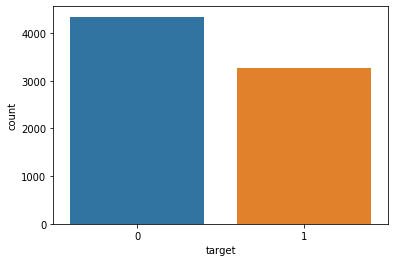

In [13]:
# visualize on target variable
se.countplot(df.target)
plt.show()

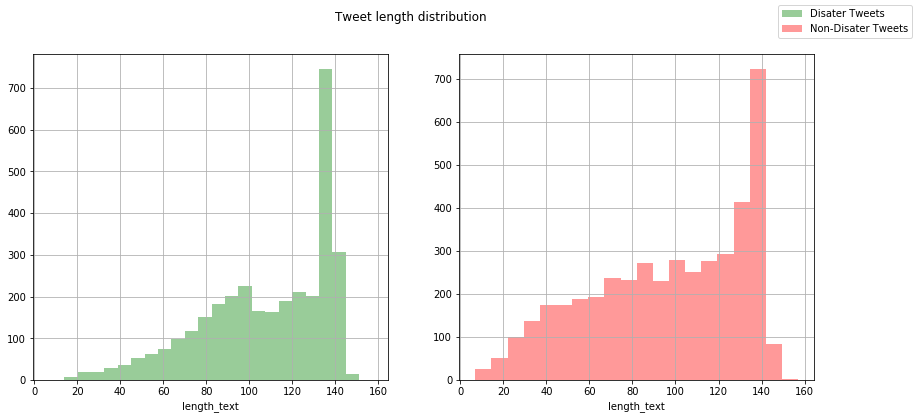

In [14]:
#Create visualization of the distribution of text length in comparision to target feature
f, (ax1, ax2) = plt.subplots(1, 2, sharex=True,figsize=(14,6))
se.distplot(df[(df['target'] == 1)]['length_text'], ax=ax1, kde=False, color='green',label='Disater Tweets')
se.distplot(df[(df['target'] == 0)]['length_text'],ax=ax2, kde=False, color='red',label='Non-Disater Tweets');
f.suptitle('Tweet length distribution')
f.legend(loc='upper right')
ax1.grid()
ax2.grid()
plt.show()

* It seems like the distribution of both kind of tweets to be almost same. About 120 to 140 characters in a tweet are the most common among both.

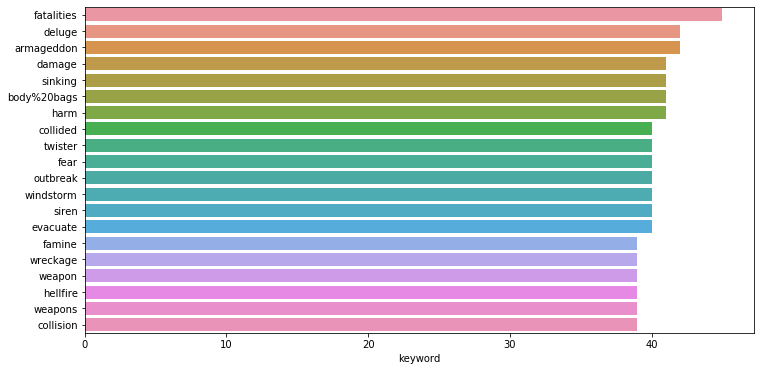

In [15]:
plt.figure(figsize=(12,6))
se.barplot(y=df['keyword'].value_counts()[:20].index,x=df['keyword'].value_counts()[:20])
plt.show()

## WordCloud :

In [16]:
import re
import string
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from wordcloud import WordCloud, STOPWORDS
from nltk.tokenize import word_tokenize
from nltk.stem.porter import PorterStemmer
from nltk.stem import WordNetLemmatizer

In [17]:
def word_cloud(target):
    words = ''
    for msg in df[df['target']==target]['text']:
        msg = msg.lower()
        msg = re.sub('\[.*?\]', '', msg)
        msg = re.sub('https?://\S+|www\.\S+', '', msg)
        msg = re.sub('<.*?>+', '', msg)
        msg = re.sub('[%s]' % re.escape(string.punctuation), '', msg)
        msg = re.sub('\w*\d\w*', '', msg)
        msg = re.sub('\n', '', msg)
        msg = re.sub('\x89û','',msg)
        msg = re.sub('rt','',msg)
        words += msg + ''
    wordcloud = WordCloud(background_color='black', width = 700, height = 400).generate(words)
    plt.figure(figsize = (15,7))
    plt.imshow(wordcloud)
    plt.axis('off')
    plt.show()

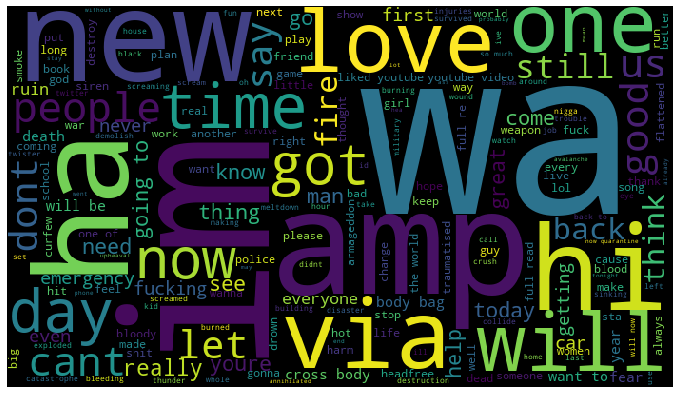

In [18]:
## Not disaster
word_cloud(0)

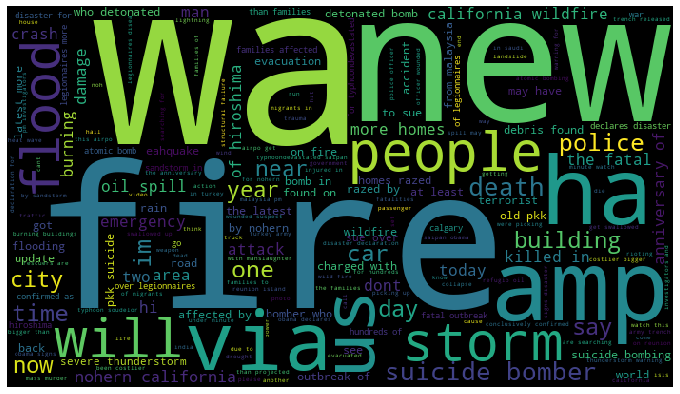

In [19]:
## Real Disaster
word_cloud(1)

In [20]:
# def word_cloud(target):
#     [df['target']==target]
words = ''
for msg in df['text']:
    msg = msg.lower()
    msg = re.sub('\[.*?\]', '', msg)
    msg = re.sub('https?://\S+|www\.\S+', '', msg)
    msg = re.sub('<.*?>+', '', msg)
    msg = re.sub('[%s]' % re.escape(string.punctuation), '', msg)
    msg = re.sub('\w*\d\w*', '', msg)
    msg = re.sub('\n', '', msg)
    msg = re.sub('\x89û','',msg)
    msg = re.sub('rt','',msg)
    words += msg + ''
words

'our deeds are the reason of this eahquake may allah forgive us allforest fire near la ronge sask canadaall residents asked to shelter in place are being notified by officers no other evacuation or shelter in place orders are expected people receive wildfires evacuation orders in california just got sent this photo from ruby alaska as smoke from wildfires pours into a school rockyfire update  california hwy  closed in both directions due to lake county fire  cafire wildfiresflood disaster heavy rain causes flash flooding of streets in manitou colorado springs areasim on top of the hill and i can see a fire in the woodstheres an emergency evacuation happening now in the building across the streetim afraid that the tornado is coming to our areathree people died from the heat wave so farhaha south tampa is getting flooded hah wait a second i live in south tampa what am i gonna do what am i gonna do fvck floodingraining flooding florida tampabay tampa  or  days ive lost count flood in bago

## Data Cleaning :
* Removing special characters and digits.

* Making all text to `lower` case.

* `Stopwords` Removal.

* `Tokenization`: Tokenization is just the term used to describe the process of converting the normal text strings into a list of tokens i.e words that we actually want.
* `Lemmatization` : Returns the base or dictionary form of a word, which is known as the lemma.

In [21]:
def text_preprocess(text):
    letters_only = re.sub("[^a-zA-Z]", " ",text)
    letters_only = letters_only.lower()
    words = letters_only.split()             
    words = [w for w in words if not w in stopwords.words("english")]
    token = [word_tokenize(word) for word in words]
    token = [''.join(ele) for ele in token]
    
    clean_text = []
    lemmatizer = WordNetLemmatizer()
    words = [lemmatizer.lemmatize(word) for word in token]
    clean_text.append(" ".join(words))
    
    return (clean_text[0])

In [22]:
from tqdm import tqdm, tqdm_notebook
tqdm.pandas()

c:\users\owner\appdata\local\programs\python\python37\lib\site-packages\tqdm\std.py:668: FutureWarning: The Panel class is removed from pandas. Accessing it from the top-level namespace will also be removed in the next version
  from pandas import Panel


In [23]:
df["lemme_text"] = df['text'].progress_apply(lambda x: text_preprocess(x))

100%|█████████████████████████████████████████████████████████████████████████████| 7613/7613 [00:57<00:00, 133.04it/s]


In [24]:
df['lemme_text']

0              deed reason earthquake may allah forgive u
1                   forest fire near la ronge sask canada
2       resident asked shelter place notified officer ...
3       people receive wildfire evacuation order calif...
4       got sent photo ruby alaska smoke wildfire pour...
                              ...                        
7608    two giant crane holding bridge collapse nearby...
7609    aria ahrary thetawniest control wild fire cali...
7610             utc km volcano hawaii http co zdtoyd ebj
7611    police investigating e bike collided car littl...
7612    latest home razed northern california wildfire...
Name: lemme_text, Length: 7613, dtype: object

In [25]:
df.head()

,id,keyword,location,text,target,length_text,lemme_text
0,1,NaN,NaN,Our Deeds are the Reason of this #earthquake M...,1,69,deed reason earthquake may allah forgive u
1,4,NaN,NaN,Forest fire near La Ronge Sask. Canada,1,38,forest fire near la ronge sask canada
2,5,NaN,NaN,All residents asked to 'shelter in place' are ...,1,133,resident asked shelter place notified officer ...
3,6,NaN,NaN,"13,000 people receive #wildfires evacuation or...",1,65,people receive wildfire evacuation order calif...
4,7,NaN,NaN,Just got sent this photo from Ruby #Alaska as ...,1,88,got sent photo ruby alaska smoke wildfire pour...


## Bag of Words - Countvectorizer :-
* The CountVectorizer provides a simple way to both tokenize a collection of text documents and build a vocabulary of known words, but also to encode new documents using that vocabulary.

In [26]:
from sklearn.feature_extraction.text import CountVectorizer

In [27]:
vec = CountVectorizer(analyzer='word')
X = vec.fit_transform(df["lemme_text"])

In [28]:
# print(vec.get_feature_names())

In [29]:
X.toarray()

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int64)

## TFIDF Features :
* `Term Frequency`: is a scoring of the frequency of the word in the current document.

* `Inverse Document Frequency`: is a scoring of how rare the word is across documents.

In [30]:
from sklearn.feature_extraction.text import TfidfTransformer

In [31]:
tfifd_X = TfidfTransformer().fit_transform(X)

In [32]:
tfifd_X.shape
# df.shape

(7613, 20679)

## Building a Text Classification model :

In [87]:
from sklearn.model_selection import train_test_split
msg_train,msg_test,label_train,label_test = train_test_split(tfifd_X.toarray(),df['target'],test_size = 0.4286,random_state=15)

In [88]:
msg_test

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [89]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [90]:
# lr = LogisticRegression()
# mn = MultinomialNB()
# dtc = DecisionTreeClassifier()
# knn = KNeighborsClassifier(n_neighbors=3)
# rfc = RandomForestClassifier()
# models = {lr: 'LogisticRegression'}
#           mn: 'MultinomialNB',
#           dtc: 'DecisionTreeClassifier',
#           knn:'KNeighborsClassifier',
#           rfc: 'RandomForestClassifier'}

In [91]:
# def model_performance(mod, mod_name, X_test, y_test, y_predict):
#     print(mod_name)
#     print('\n')
#     print('Accuracy score is : {}'.format(accuracy_score(y_test, y_predict)))
#     print('\n')
#     print('confusion_matrix : ')
#     print(confusion_matrix(y_test, y_predict))
#     print('\n')
#     print('classification_report :')
#     print(classification_report(y_test, y_predict))
#     print('*'*60)

In [92]:
lr = LogisticRegression()
lr.fit(msg_train,label_train)
predict = lr.predict(msg_test)
print(accuracy_score(label_test, predict))
print(predict.shape)

0.793748084584738
(3263,)


In [53]:
# dic = {"algo":[],"accuracy_score":[]}
# for mod, mod_name in models.items():
#     fit = mod.fit(msg_train,label_train)
#     # Making predictions
#     predict = fit.predict(msg_test)
#     # Reviewing the metrics
#     model_performance(mod, mod_name, msg_test, label_test, predict)
#     dic["algo"].append(mod_name)
#     dic["accuracy_score"].append(accuracy_score(label_test,predict))

In [93]:
submission = pd.DataFrame({'target' : predict})
submission.to_csv('submission.csv')

In [97]:
df_sub = pd.read_csv('submission.csv')
df_sub

,Unnamed: 0,target
0,0,1
1,1,0
2,2,1
3,3,1
4,4,1
...,...,...
3258,3258,0
3259,3259,0
3260,3260,1
3261,3261,0


## Conclusion :
* I took a Kaggle challenge to classify tweets into disaster tweets in real or not?. 
    * First, I have analyzed and explored all the provided tweets data to visualize the statistical and other properties of the presented data.
    * Next, I performed some exploratory analysis of the data to check type of the data, whether there are unwanted features and if features have missing data. Based on the analysis.
    * The ‘text’ columns is all text data along with alpha numeric, special characters and embedded URLs.The ‘text’ column data needs to be cleaned and pre processed and vectorized before it can be used with a machine learning algorithm for the classification of the tweets.
    * After pre processing the train data, the data was vectorized using `CountVectorizer` and `TFIDF` features.
    * Then various classifiers were fit on the data and predictions were made.
    * `LogisticRegression()` fits are model best with less time complexity and with Accuracy Score of 80.25 %.

## Prediction on Future Data Points :-

In [ ]:
mode = LogisticRegression()
mode.fit(tfifd_X,df['target'])

In [ ]:
from pickle import dump
dump(vec, open('pickle/disaster_countvectorizer.pkl', 'wb'))
dump(mode, open('pickle/disaster_decision_model.pkl', 'wb'))

In [ ]:
from pickle import load
from sklearn.tree import DecisionTreeClassifier
from sklearn.feature_extraction.text import CountVectorizer
import re
import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
import string

In [ ]:
def text_preprocess(pre_text):
    # Removing special characters and digits
    letters_only = re.sub("[^a-zA-Z]", " ",pre_text)
    
    # change sentence to lower case
    letters_only = letters_only.lower()
    words = letters_only.split()
    
    # remove stop words                
    words = [w for w in words if not w in stopwords.words("english")]
    #Tokenization
    token = [word_tokenize(word) for word in words]
    token = [''.join(ele) for ele in token]
    
    clean_text = []
    lemmatizer = WordNetLemmatizer()
    words = [lemmatizer.lemmatize(word) for word in token]
    clean_text.append(" ".join(words))
    
    return (clean_text[0])

In [ ]:
def predict(text):
    
    # Loading pretrained CountVectorizer from pickle file
    vectorizer = load(open('pickle/disaster_countvectorizer.pkl', 'rb'))
    
    # Loading pretrained logistic classifier from pickle file
    classifier = load(open('pickle/disaster_decision_model.pkl', 'rb'))
    
    clean_text = text_preprocess(text)
    
    # Converting text to numerical vector
    clean_text_vec = vectorizer.transform([clean_text])
    
    # Converting sparse matrix to dense matrix
    text_input = clean_text_vec.toarray()
    
    # Prediction
    prediction = classifier.predict(text_input)
    
    return prediction

In [ ]:
text = input("Enter a tweet to check its sentiment: ")

prediction = predict(text)

print(prediction)
# An #Earthquake of magnitude 5.0 struck 20 kn North East of Campbell Bay, Andaman and Nicobar Island at 20:12 hours today.

In [ ]:
if(prediction == 0):
    print("It's not Disaster")
else:
    print("It's Disaster")